### Capstone Project: Learn CO2 Emissions through Machine Learning Model

In [2]:
# Import Library
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Model Development
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import GridSearchCV
from hyperopt import hp, tpe, fmin, Trials

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# For exporting model
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

2025-01-08 06:23:24.864280: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-08 06:23:25.121137: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-08 06:23:25.312317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736317405.601785    2316 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736317405.666317    2316 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-08 06:23:26.311245: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
# Import dataset
df = pd.read_csv('/workspaces/machine_learning_zoomcamp/Capstone_Project/data/CO2_Emissions_Canada.csv')
df.columns = df.columns.str.replace(' ', '_').str.lower()
df

,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l/100_km),fuel_consumption_hwy_(l/100_km),fuel_consumption_comb_(l/100_km),fuel_consumption_comb_(mpg),co2_emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [4]:
# Inspect the dataset
def inspect_data(df):
    print("Dataset Info:\n")
    print(df.info())
    print("\nMissing Values:\n")
    print(df.isnull().sum())

inspect_data(df)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   make                              7385 non-null   object 
 1   model                             7385 non-null   object 
 2   vehicle_class                     7385 non-null   object 
 3   engine_size(l)                    7385 non-null   float64
 4   cylinders                         7385 non-null   int64  
 5   transmission                      7385 non-null   object 
 6   fuel_type                         7385 non-null   object 
 7   fuel_consumption_city_(l/100_km)  7385 non-null   float64
 8   fuel_consumption_hwy_(l/100_km)   7385 non-null   float64
 9   fuel_consumption_comb_(l/100_km)  7385 non-null   float64
 10  fuel_consumption_comb_(mpg)       7385 non-null   int64  
 11  co2_emissions(g/km)               7385 non-null   int6

Result: The duplicate values seems have similar model but varies in its engine size (L) and the number of cylinders. It will remain used for next analysis and in the dataset, there is no missing values

#### Exploratory Data Analysis (EDA)
##### Categorical Variables

In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['make', 'model', 'vehicle_class', 'transmission', 'fuel_type'], dtype='object')

Model column will be not used in the visualization since the there are too many values in the dataset and it makes the chart is difficult to read

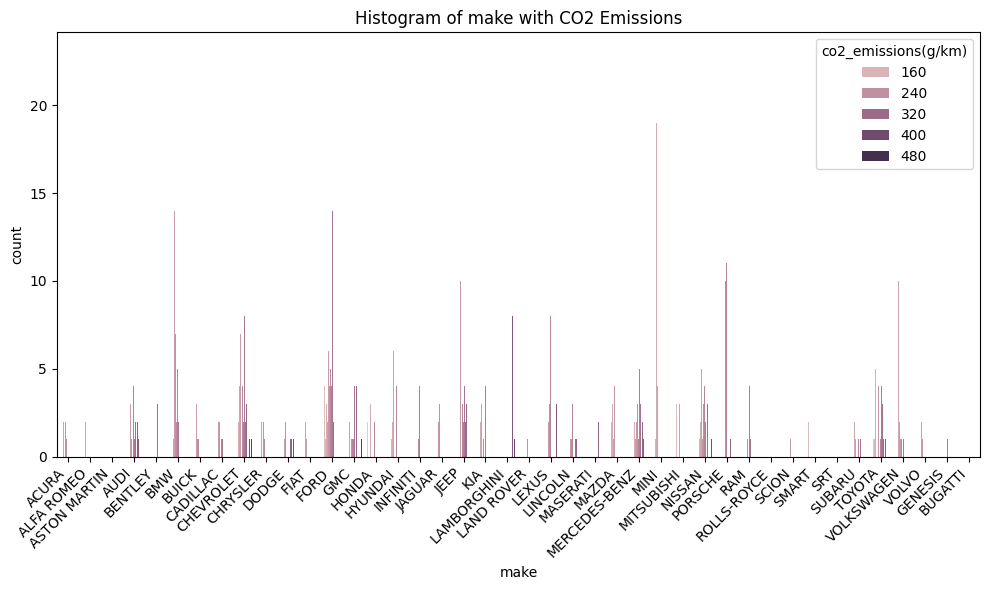

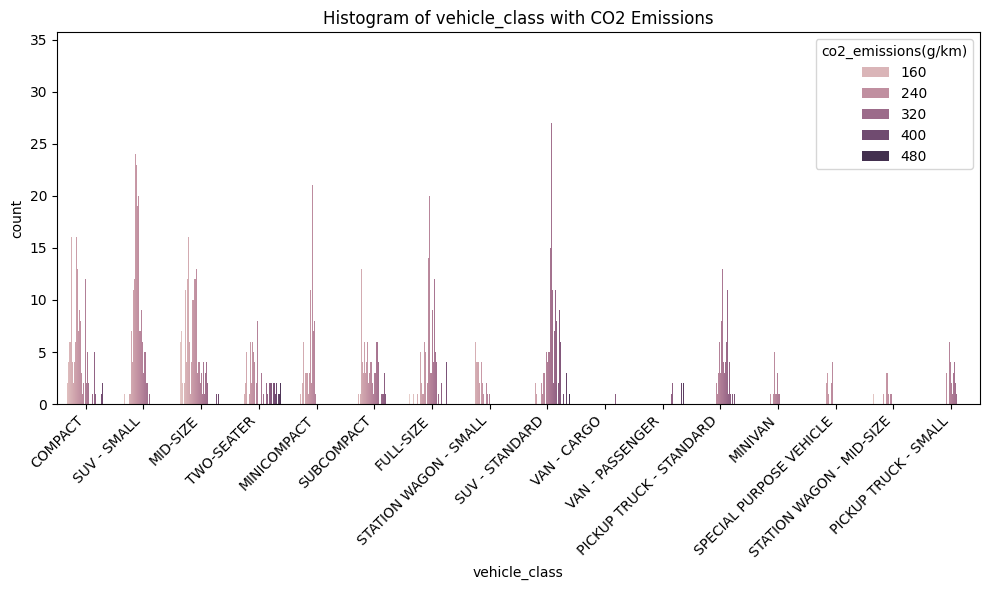

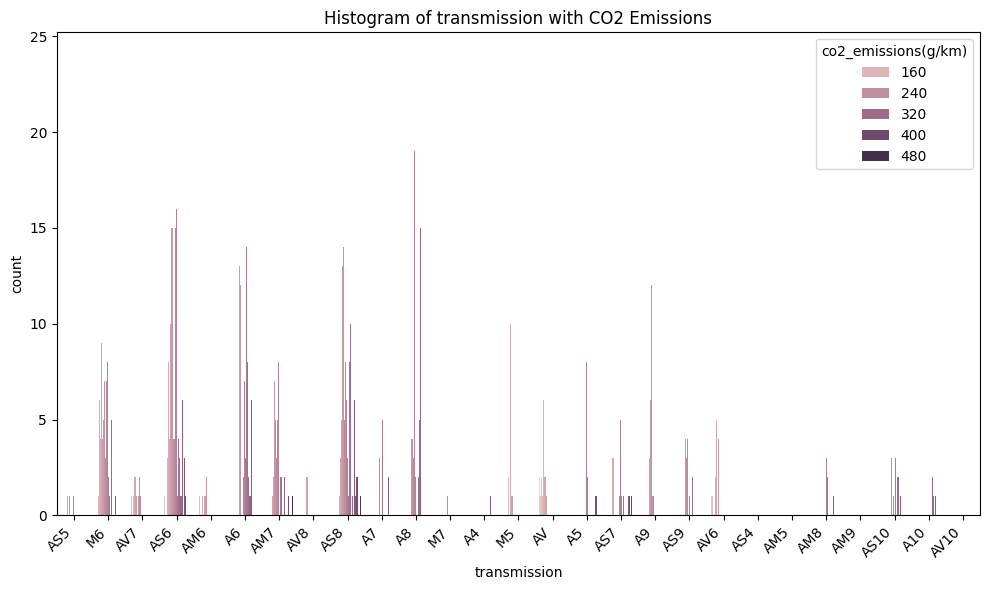

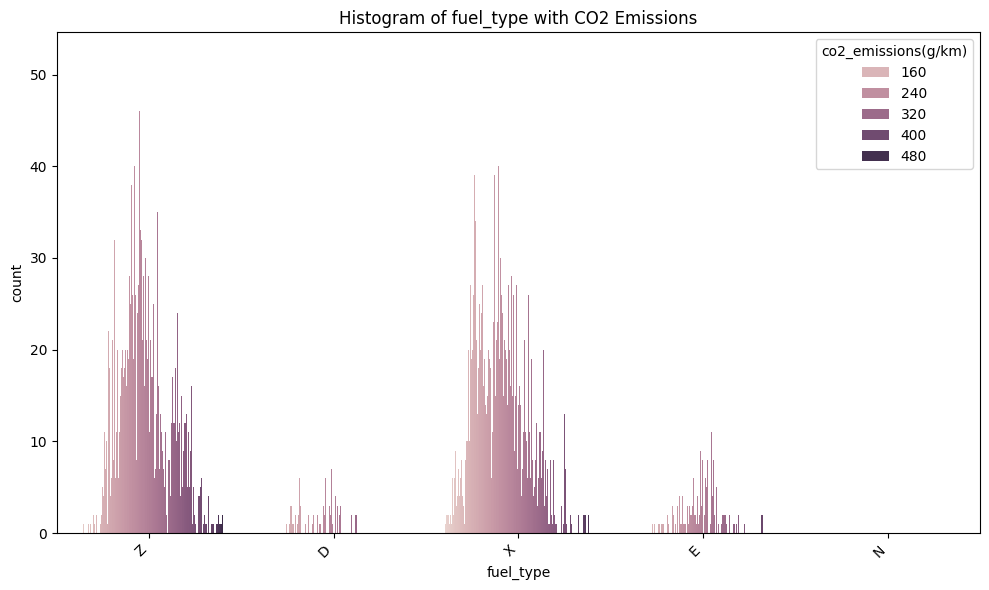

In [6]:
categorical_columns = ['make','vehicle_class', 'transmission', 'fuel_type']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='co2_emissions(g/km)')
    plt.title(f"Histogram of {col} with CO2 Emissions")
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

Since the fuel_type "N" is near to zero, for further analysis, it will be removed from the dataset

In [7]:
# Data cleaning
df_clean = df[df['fuel_type'] != "N"]

categorical_columns = df_clean.select_dtypes(include=['object']).columns
# Apply one-hot encoding
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column])
    label_encoders[column] = le
    
df_clean.head()

,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l/100_km),fuel_consumption_hwy_(l/100_km),fuel_consumption_comb_(l/100_km),fuel_consumption_comb_(mpg),co2_emissions(g/km)
0,0,1057,0,2.0,4,14,3,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,3,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,3,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,3,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,3,12.1,8.7,10.6,27,244


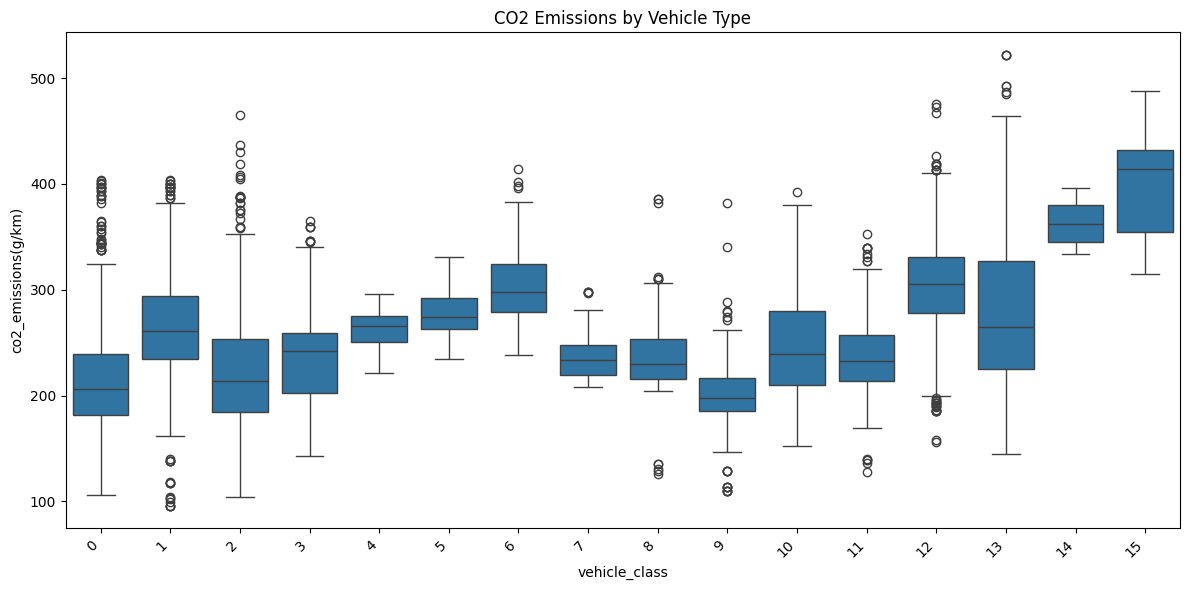

In [8]:
# Analyze Vehicle Type, Fuel Consumption, and Fuel Type with CO2 Emissions
# Vehicle Type vs CO2 Emissions

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='vehicle_class', y='co2_emissions(g/km)')
plt.title("CO2 Emissions by Vehicle Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

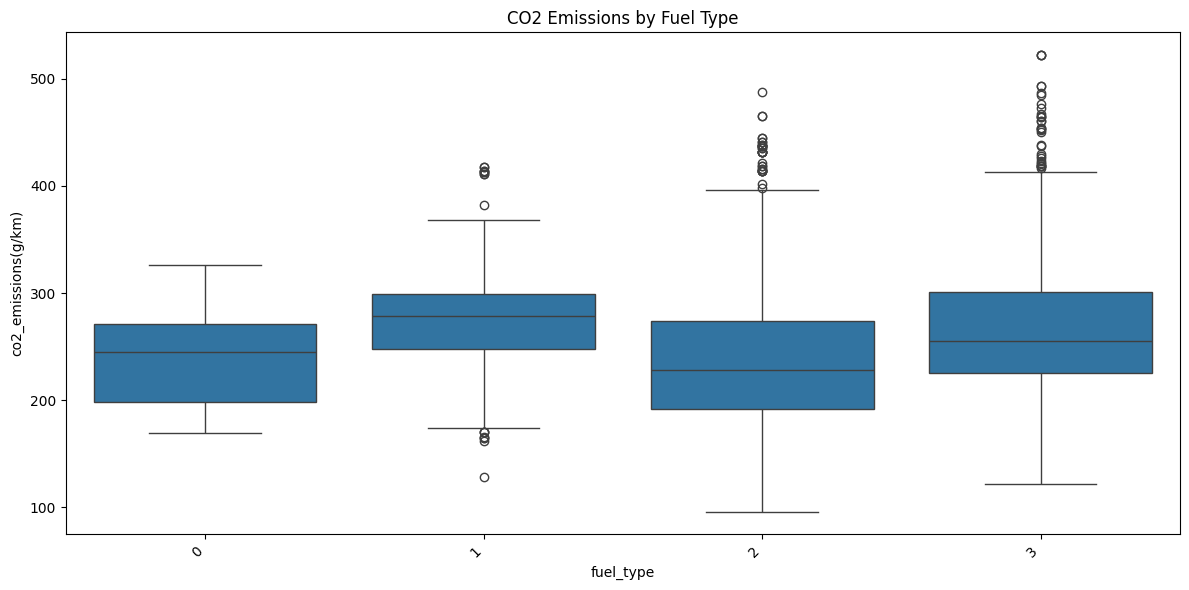

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='fuel_type', y='co2_emissions(g/km)')
plt.title("CO2 Emissions by Fuel Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the boxplot, some outliers appear in the co2 emission column in the category of fuel type

#### Numerical Variables

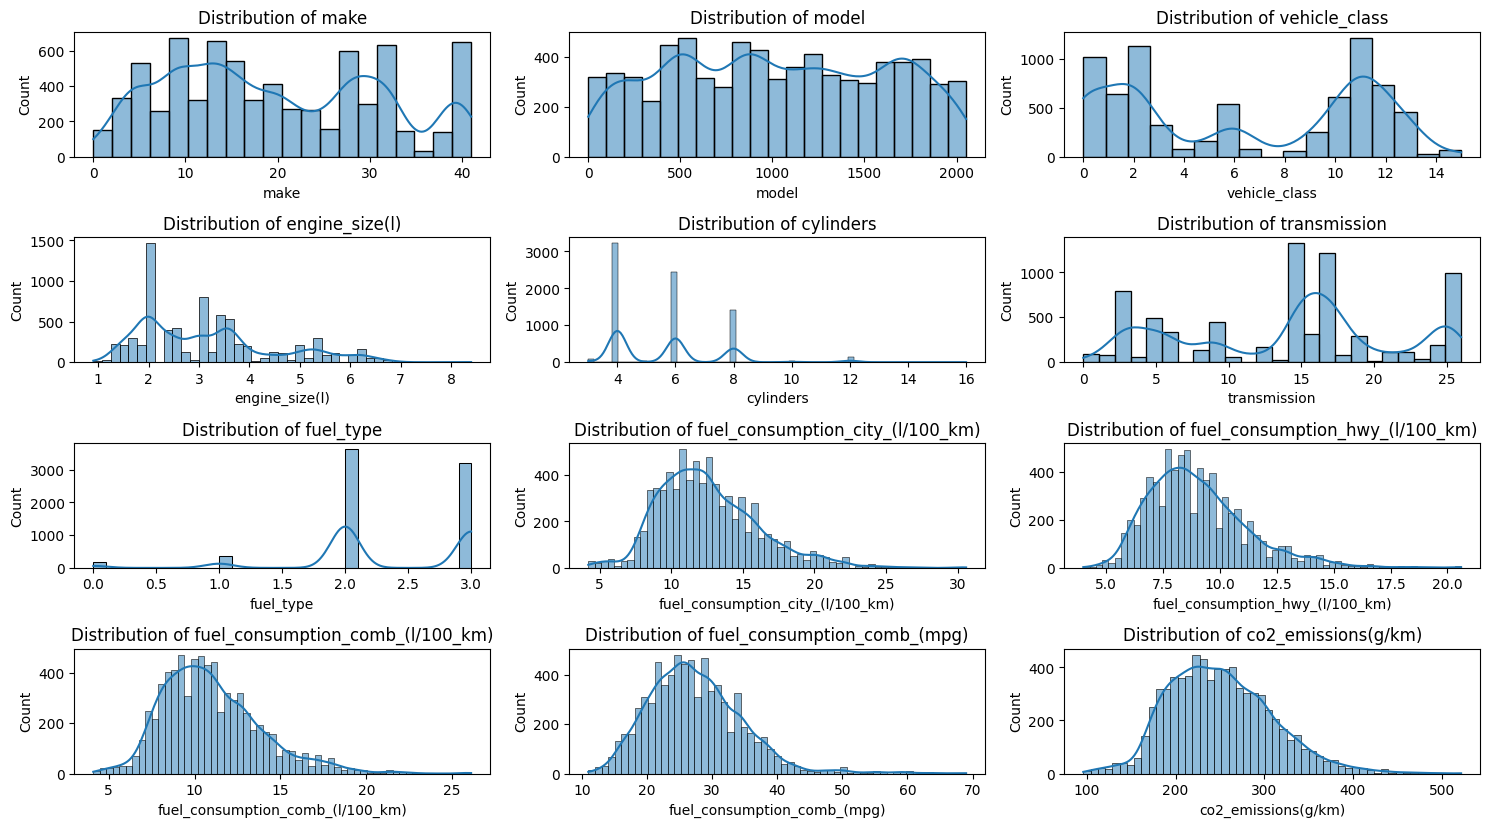

In [10]:
numerical_df = df_clean.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df_clean, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

For quick view from the histogram, most of the original numeric columns, fuel consumption and co2 emission as the target has good distribution compared to the categorical columns that have been converted

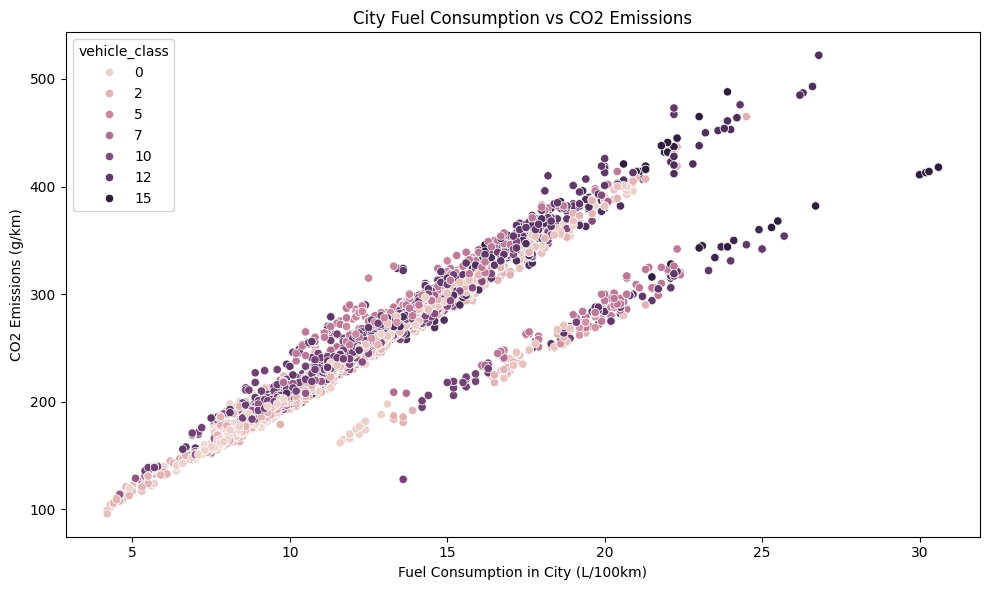

In [11]:
# Fuel Consumption in City vs CO2 Emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='fuel_consumption_city_(l/100_km)', y='co2_emissions(g/km)', hue='vehicle_class')
plt.title("City Fuel Consumption vs CO2 Emissions")
plt.xlabel("Fuel Consumption in City (L/100km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.tight_layout()
plt.show()

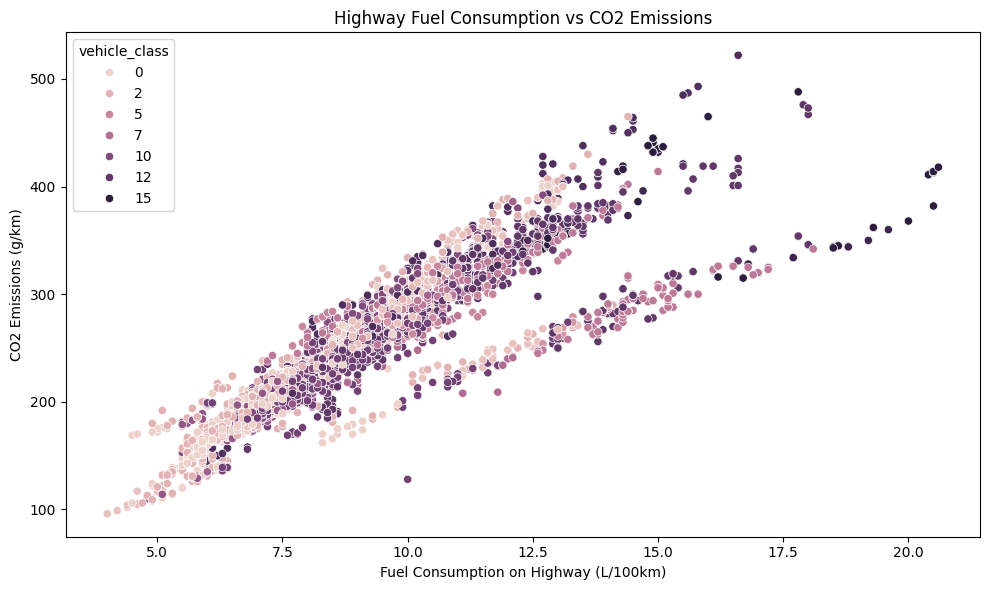

In [12]:
# Fuel Consumption on Highway vs CO2 Emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='fuel_consumption_hwy_(l/100_km)', y='co2_emissions(g/km)', hue='vehicle_class')
plt.title("Highway Fuel Consumption vs CO2 Emissions")
plt.xlabel("Fuel Consumption on Highway (L/100km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.tight_layout()
plt.show()

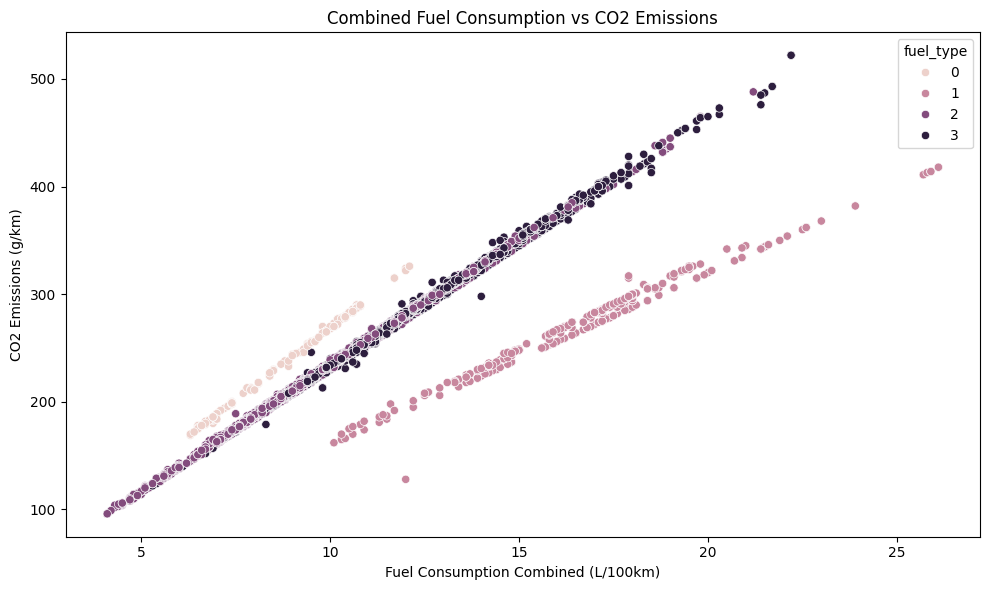

In [13]:
# Combined Fuel Consumption vs CO2 Emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='fuel_consumption_comb_(l/100_km)', y='co2_emissions(g/km)', hue='fuel_type')
plt.title("Combined Fuel Consumption vs CO2 Emissions")
plt.xlabel("Fuel Consumption Combined (L/100km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.tight_layout()
plt.show()

We can see the correlation between CO2 emission and other variables from different points of view with the scatter plots. The fuel consumption implies that the linear increment with high fuel consumption is aligned with the high number of CO2 emissions. This applies to small or oversized vehicles, as described by the colour on the scatter plot. By changing the colour to the fuel type, we can get a pretty big gap between fuel X and the rest, indicating that fuel X can have a shallow increase in CO2 emission with high fuel consumption in both cities and highways (combined).

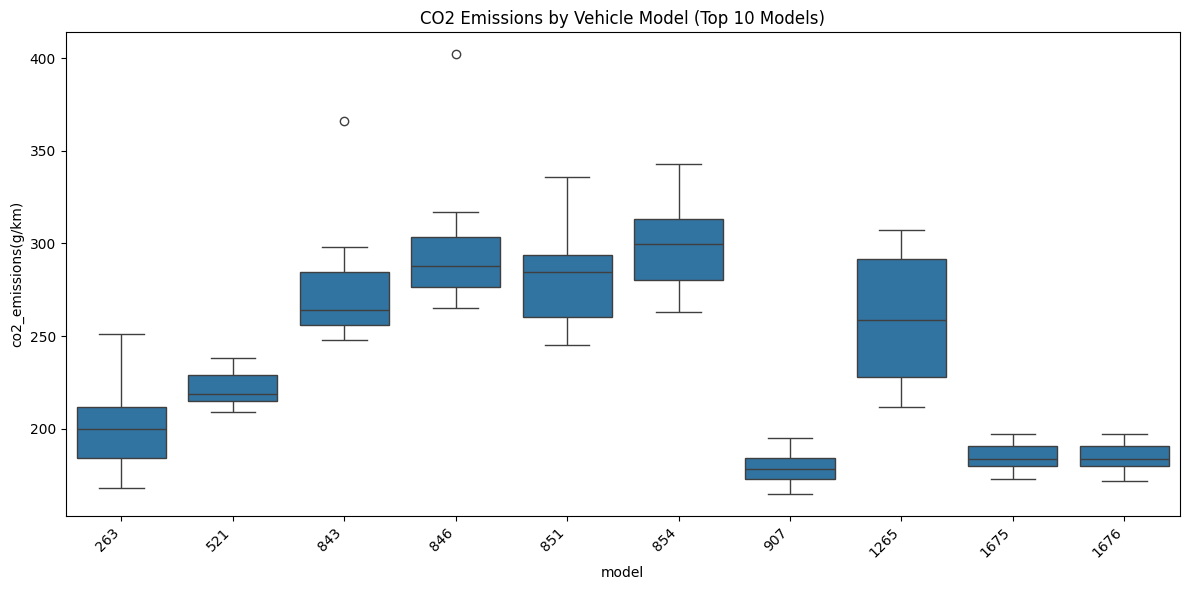

In [14]:
# CO2 Emissions by Vehicle Model
top_models = df_clean['model'].value_counts().nlargest(10).index
filtered_df = df_clean[df_clean['model'].isin(top_models)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='model', y='co2_emissions(g/km)')
plt.title("CO2 Emissions by Vehicle Model (Top 10 Models)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

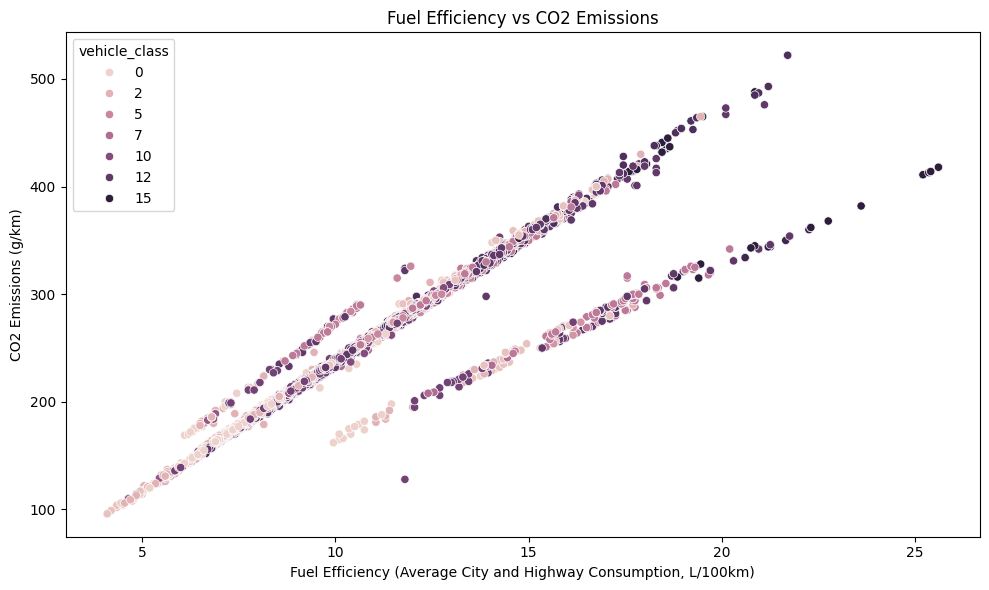

In [20]:
df_clean['fuel_efficiency'] = (df_clean['fuel_consumption_city_(l/100_km)'] + df_clean['fuel_consumption_hwy_(l/100_km)']) / 2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='fuel_efficiency', y='co2_emissions(g/km)', hue='vehicle_class')
plt.title("Fuel Efficiency vs CO2 Emissions")
plt.xlabel("Fuel Efficiency (Average City and Highway Consumption, L/100km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.tight_layout()
plt.show()

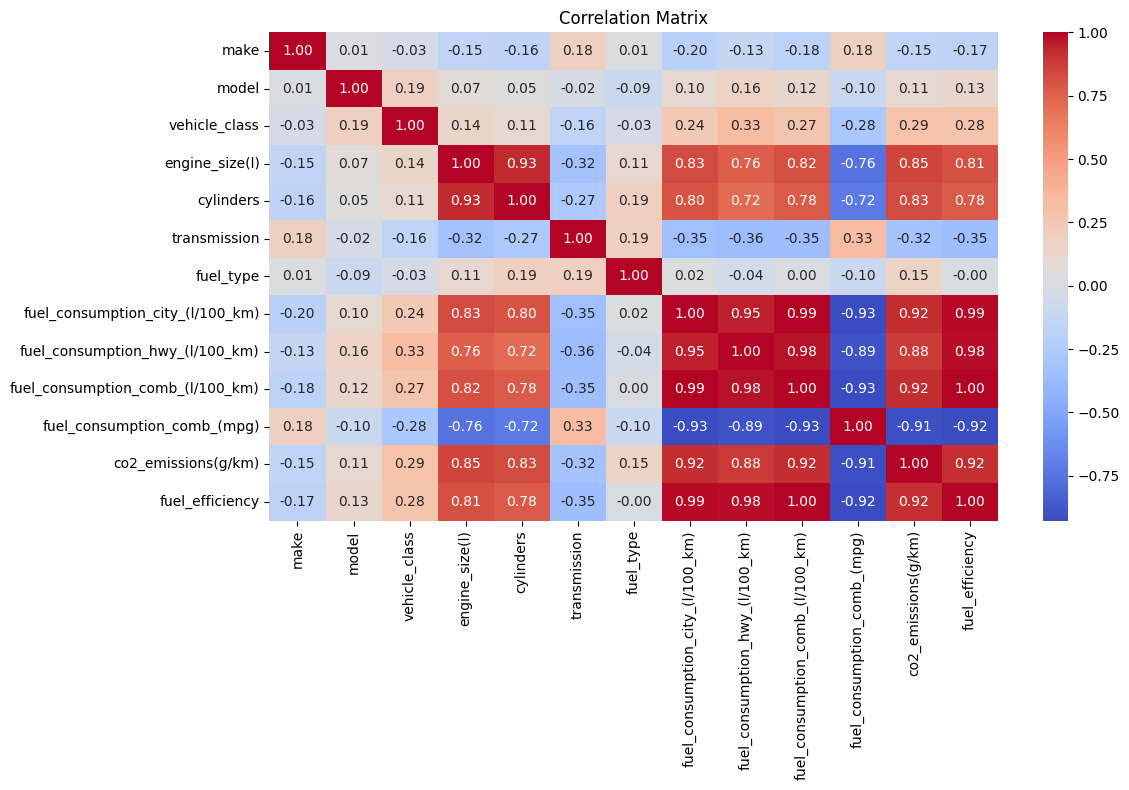

In [21]:
# Compute the correlation matrix for numerical columns
correlation_matrix = df_clean.select_dtypes(include=['float64', 'int64']).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Based on correlation matrix, for model development, I will not use fuel consumption variables and see the impact on the model development for CO2 emissions prediction and replace it with fuel_efficiency variable

#### Model Development and Training

In [22]:
df_clean.dtypes

make                                  int64
model                                 int64
vehicle_class                         int64
engine_size(l)                      float64
cylinders                             int64
transmission                          int64
fuel_type                             int64
fuel_consumption_city_(l/100_km)    float64
fuel_consumption_hwy_(l/100_km)     float64
fuel_consumption_comb_(l/100_km)    float64
fuel_consumption_comb_(mpg)           int64
co2_emissions(g/km)                   int64
fuel_efficiency                     float64
dtype: object

In [23]:
# Split data into features and target
X = df_clean.drop(columns=['fuel_consumption_city_(l/100_km)', 'co2_emissions(g/km)', 'fuel_consumption_hwy_(l/100_km)', 
                           'fuel_consumption_comb_(l/100_km)', 'fuel_consumption_comb_(mpg)'])
y = df_clean['co2_emissions(g/km)']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Quick Feature Importance before model development

In [25]:
from sklearn import ensemble as en
import boruta as bt

x_train_n = X.values
y_train_n = y.values.ravel()

# define random forest
rf = en.RandomForestRegressor(n_jobs=-1, random_state=42)

# define boruta
boruta = bt.BorutaPy(rf, n_estimators='auto', verbose=1, max_iter=1000, random_state=42).fit(x_train_n, y_train_n )

Iteration: 1 / 1000
Iteration: 2 / 1000
Iteration: 3 / 1000
Iteration: 4 / 1000
Iteration: 5 / 1000
Iteration: 6 / 1000
Iteration: 7 / 1000
Iteration: 8 / 1000
Iteration: 9 / 1000
Iteration: 10 / 1000
Iteration: 11 / 1000
Iteration: 12 / 1000
Iteration: 13 / 1000
Iteration: 14 / 1000
Iteration: 15 / 1000
Iteration: 16 / 1000
Iteration: 17 / 1000
Iteration: 18 / 1000
Iteration: 19 / 1000
Iteration: 20 / 1000
Iteration: 21 / 1000
Iteration: 22 / 1000
Iteration: 23 / 1000
Iteration: 24 / 1000
Iteration: 25 / 1000
Iteration: 26 / 1000
Iteration: 27 / 1000
Iteration: 28 / 1000
Iteration: 29 / 1000
Iteration: 30 / 1000
Iteration: 31 / 1000
Iteration: 32 / 1000
Iteration: 33 / 1000
Iteration: 34 / 1000
Iteration: 35 / 1000
Iteration: 36 / 1000
Iteration: 37 / 1000
Iteration: 38 / 1000
Iteration: 39 / 1000
Iteration: 40 / 1000
Iteration: 41 / 1000
Iteration: 42 / 1000
Iteration: 43 / 1000
Iteration: 44 / 1000
Iteration: 45 / 1000
Iteration: 46 / 1000
Iteration: 47 / 1000
Iteration: 48 / 1000
I

In [26]:
columns_selected = boruta.support_.tolist()

# best features
X_train_fs = X
columns_selected_boruta = X_train_fs.iloc[:, columns_selected].columns.to_list()

columns_selected_boruta

['make',
 'model',
 'engine_size(l)',
 'cylinders',
 'fuel_type',
 'fuel_efficiency']

Based on Boruta calculation and using Random Forest, there are six best features from the dataset including variable make, model, engine_size(l), cylinders, fuel_type, and fuel_efficiency

In [27]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"MSE: {mse:.2f}, R2: {r2:.2f}\n")
    return model, y_pred

def analyze_overfitting_underfitting(cv_results):
    train_r2 = cv_results['train_r2']
    test_r2 = cv_results['test_r2']
    mean_train_r2 = np.mean(train_r2)
    mean_test_r2 = np.mean(test_r2)

    if mean_train_r2 - mean_test_r2 > 0.1:
        print("Potential Overfitting: Train R2 is significantly higher than Test R2.")
    elif mean_test_r2 < 0.5:
        print("Potential Underfitting: Test R2 is low.")
    else:
        print("Model seems well-balanced.")

def find_best_model(cross_val_results):
    best_model = None
    best_score = -np.inf

    for model_name, results in cross_val_results.items():
        test_r2_mean = np.mean(results['test_r2'])
        if test_r2_mean > best_score:
            best_score = test_r2_mean
            best_model = model_name

    print(f"Best Model: {best_model} with Mean Test R2: {best_score:.2f}")

In [28]:
from sklearn.base import BaseEstimator, RegressorMixin

# Wrapper for XGBRegressor
class XGBRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, **kwargs):
        self.model = XGBRegressor(**kwargs)
        self.params = kwargs  # Store parameters

    def set_params(self, **params):
        self.params.update(params)
        self.model.set_params(**params)
        return self

    def get_params(self, deep=True):
        return self.params

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Lasso': Lasso(alpha=0.1),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVM': SVR(),
    'XGBoost': XGBRegressorWrapper(random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42)
}

trained_models = {}
predictions = {}
cross_val_results = {}
for name, model in models.items():
    print(f"Training {name}...")
    trained_model, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
    trained_models[name] = trained_model
    predictions[name] = y_pred

    # Perform cross-validation
    print(f"Performing cross-validation for {name}...")
    cv_results = cross_validate(
        model, X_train, y_train, 
        scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], 
        cv=5, return_train_score=True
    )
    cross_val_results[name] = cv_results
    print(f"Cross-validation results for {name}:")
    for metric, values in cv_results.items():
        if metric.startswith('test_') or metric.startswith('train_'):
            print(f"{metric}: {values}, Mean: {np.mean(values):.2f}, Std Dev: {np.std(values):.2f}")
    analyze_overfitting_underfitting(cv_results)
    print()

# Find the best model
find_best_model(cross_val_results)

Training Random Forest...
Model: RandomForestRegressor
MSE: 8.49, R2: 1.00

Performing cross-validation for Random Forest...
Cross-validation results for Random Forest:
test_r2: [0.99565548 0.99761174 0.9904346  0.99739793 0.99796963], Mean: 1.00, Std Dev: 0.00
train_r2: [0.99938487 0.99937336 0.99951722 0.99932542 0.99923   ], Mean: 1.00, Std Dev: 0.00
test_neg_mean_absolute_error: [-1.95782754 -1.88635742 -2.18307542 -1.91026267 -1.81561608], Mean: -1.95, Std Dev: 0.12
train_neg_mean_absolute_error: [-0.83259941 -0.83090711 -0.80732615 -0.81759621 -0.84123533], Mean: -0.83, Std Dev: 0.01
test_neg_mean_squared_error: [-14.55977598  -8.05082871 -32.01399856  -9.03797965  -7.1071632 ], Mean: -14.15, Std Dev: 9.30
train_neg_mean_squared_error: [-2.10624731 -2.14259283 -1.65336387 -2.28865917 -2.60783987], Mean: -2.16, Std Dev: 0.31
test_neg_root_mean_squared_error: [-3.81572745 -2.83739823 -5.65809142 -3.00632328 -2.66592633], Mean: -3.60, Std Dev: 1.10
train_neg_root_mean_squared_error:

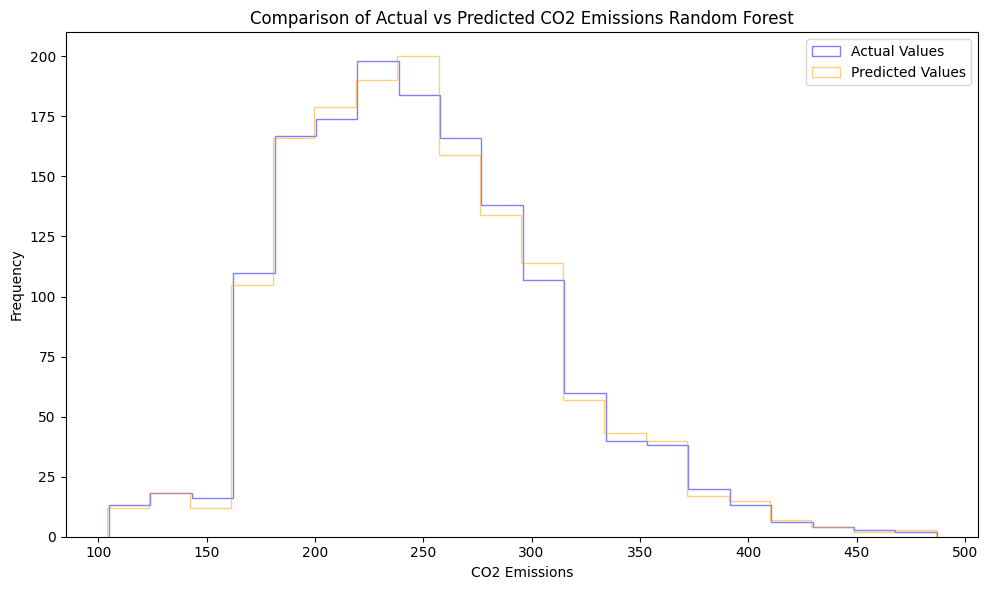

Model development, cross-validation, and testing completed.


In [29]:
rf_predictions = predictions['Random Forest']
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, alpha=0.5, histtype='step',label="Actual Values", color="blue")
plt.hist(rf_predictions, bins=20, alpha=0.5, histtype='step',label="Predicted Values", color="orange")
plt.title("Comparison of Actual vs Predicted CO2 Emissions Random Forest")
plt.xlabel("CO2 Emissions")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

print("Model development, cross-validation, and testing completed.")

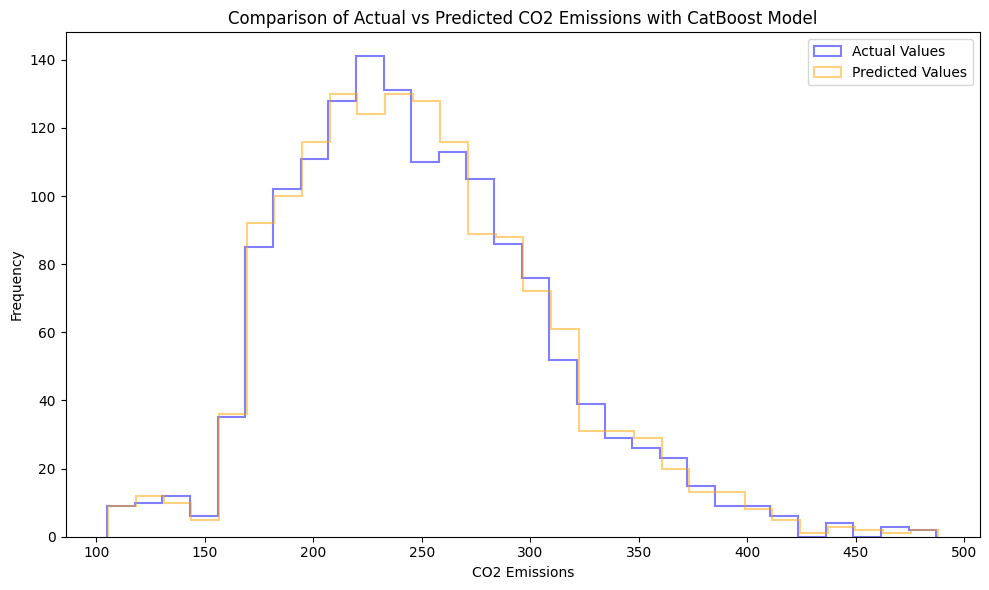

Model development, cross-validation, and testing completed.


In [30]:
rf_predictions = predictions['CatBoost']
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, histtype='step', label="Actual Values", color="blue", linewidth=1.5)
plt.hist(rf_predictions, bins=30, histtype='step', alpha=0.5, label="Predicted Values", color="orange", linewidth=1.5)
plt.title("Comparison of Actual vs Predicted CO2 Emissions with CatBoost Model")
plt.xlabel("CO2 Emissions")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

print("Model development, cross-validation, and testing completed.")

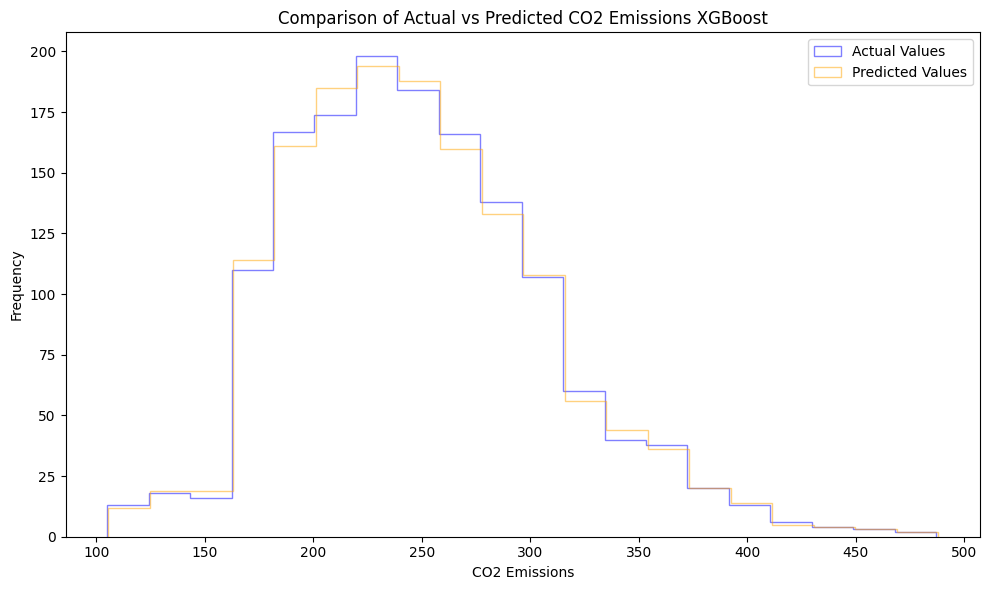

Model development, cross-validation, and testing completed.


In [31]:
xgb_predictions = predictions['XGBoost']
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, alpha=0.5, histtype='step',label="Actual Values", color="blue")
plt.hist(rf_predictions, bins=20, alpha=0.5, histtype='step',label="Predicted Values", color="orange")
plt.title("Comparison of Actual vs Predicted CO2 Emissions XGBoost")
plt.xlabel("CO2 Emissions")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

print("Model development, cross-validation, and testing completed.")

#### Hyperparameter Tuning for XGBoost as the Selected Model

In [35]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

def objective(params):
    dtrain = xgb.DMatrix(X_train, label=y_train)  # Convert data to DMatrix format
    
    # XGBoost parameters
    xgb_params = {
        'objective': 'reg:squarederror',
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate': params['learning_rate'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'reg_alpha': params['reg_alpha'],
        'reg_lambda': params['reg_lambda']
    }
    
    # Perform cross-validation
    cv_results = xgb.cv(
        xgb_params,
        dtrain,
        num_boost_round=100,
        nfold=3,
        metrics='rmse',
        as_pandas=True,
        seed=42
    )
    
    # Return the mean RMSE from the cross-validation
    return {'loss': cv_results['test-rmse-mean'].min(), 'status': STATUS_OK}

# Define the search space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 10),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0, 10),
    'reg_lambda': hp.uniform('reg_lambda', 0, 10)
}

# Optimize the hyperparameters
trials = Trials()
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,  # Number of iterations
    trials=trials
)

# Convert integer parameters to int for XGBoost compatibility
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])

print("Best Hyperparameters:", best_params)

100%|██████████| 50/50 [00:21<00:00,  2.38trial/s, best loss: 3.4931071498412067]
Best Hyperparameters: {'colsample_bytree': 0.8053918599464294, 'learning_rate': 0.1888283256388348, 'max_depth': 5, 'n_estimators': 230, 'reg_alpha': 0.00941516952060617, 'reg_lambda': 1.077428094707186, 'subsample': 0.6448922037165689}


In [36]:
# Convert training data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define parameters based on tuned hyperparameters
xgb_params = {
    'objective': 'reg:squarederror',
    'n_estimators': best_params['n_estimators'],
    'max_depth': best_params['max_depth'],
    'learning_rate': best_params['learning_rate'],
    'subsample': best_params['subsample'],
    'colsample_bytree': best_params['colsample_bytree'],
    'reg_alpha': best_params['reg_alpha'],
    'reg_lambda': best_params['reg_lambda'],
    'seed': 42
}

# Perform cross-validation
cv_results = xgb.cv(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=best_params['n_estimators'],  # Use tuned number of estimators
    nfold=5,  # Number of folds
    metrics='rmse',
    as_pandas=True,
    seed=42
)

# Display cross-validation results
print(cv_results)

# Extract the mean RMSE from the cross-validation
mean_rmse = cv_results['test-rmse-mean'].min()
print(f"Mean RMSE from Cross-Validation: {mean_rmse:.2f}")

     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          49.492098        0.295671       49.562417       1.256620
1          40.543070        0.237661       40.641005       1.026136
2          33.279535        0.205405       33.400088       0.880652
3          27.622643        0.173696       27.807546       0.735816
4          23.098342        0.156118       23.300740       0.676699
..               ...             ...             ...            ...
225         2.017594        0.039267        3.300377       0.389050
226         2.015376        0.039287        3.298809       0.389035
227         2.014346        0.038905        3.298636       0.390022
228         2.012801        0.039274        3.297236       0.389635
229         2.010530        0.039221        3.296652       0.390082

[230 rows x 4 columns]
Mean RMSE from Cross-Validation: 3.30


In [37]:
# Train the model on the full training set
xgb_model = xgb.XGBRegressor(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    random_state=42,
    verbosity=0,
    use_label_encoder=False
)
xgb_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = xgb_model.predict(X_test)

# Calculate RMSE and R²
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Test Set RMSE: {rmse:.2f}")
print(f"Test Set R²: {r2:.2f}")

Test Set RMSE: 3.02
Test Set R²: 1.00


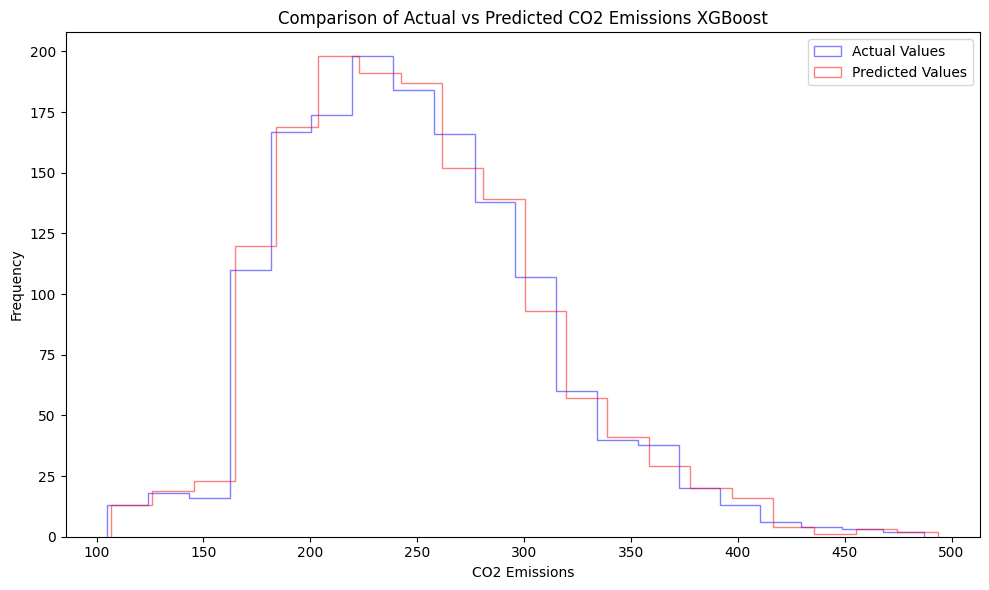

Model development, cross-validation, and testing completed.


In [38]:
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, alpha=0.5, histtype='step',label="Actual Values", color="blue")
plt.hist(y_pred, bins=20, alpha=0.5, histtype='step',label="Predicted Values", color="red")
plt.title("Comparison of Actual vs Predicted CO2 Emissions XGBoost")
plt.xlabel("CO2 Emissions")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

print("Model development, cross-validation, and testing completed.")

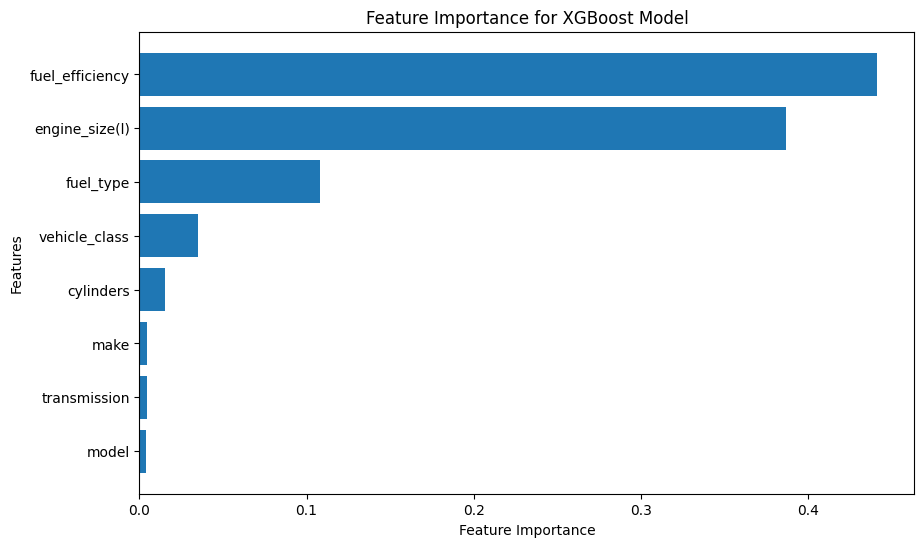

In [40]:
# Get the feature names
feature_names = X.columns

X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Extract feature importance from the trained model
feature_importance = xgb_model.feature_importances_

# Sort feature importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = X_train_df.columns[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for XGBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [41]:
# Export the updated model
import joblib

# Save the model
joblib.dump(xgb_model, "/workspaces/machine_learning_zoomcamp/Capstone_Project/model/xgboost_best_model.pkl")

['/workspaces/machine_learning_zoomcamp/Capstone_Project/model/xgboost_best_model.pkl']

In [43]:
# Export result and processing dataset into csv format
comparison_df = pd.DataFrame({
    'Index': range(len(y_test)),
    'Original': y_test,
    'Predicted': y_pred
})

comparison_df.to_csv('/workspaces/machine_learning_zoomcamp/Capstone_Project/result_processed_data/prediction_result.csv')

#### Test Run Neural Network Approach with Tensorflow

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
## Testing tensorflow
def build_nn(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Build and train the neural network
nn_model = build_nn(X_train.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the neural network
nn_test_loss, nn_test_mae = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Test Loss (MSE): {nn_test_loss:.2f}")
print(f"Neural Network Test MAE: {nn_test_mae:.2f}")

# Predict with the neural network
nn_predictions = nn_model.predict(X_test).flatten()

2025-01-08 07:06:55.771677: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 58962.0117 - mae: 232.7847 - val_loss: 4146.5933 - val_mae: 52.3382
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4119.4316 - mae: 50.5079 - val_loss: 1574.0793 - val_mae: 30.7345
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2155.7327 - mae: 36.5024 - val_loss: 1072.3507 - val_mae: 25.4233
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1745.7034 - mae: 33.1177 - val_loss: 770.0142 - val_mae: 21.4879
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1422.9680 - mae: 29.9044 - val_loss: 575.9369 - val_mae: 18.3673
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1307.2451 - mae: 28.7320 - val_loss: 472.4831 - val_mae: 16.3970
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1060.4834 - mae: 25.5644 - val_loss: 413.3780 - val_mae: 15.2119
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1016.4731 - mae: 24.6896 - val_loss: 396.6140 - val_

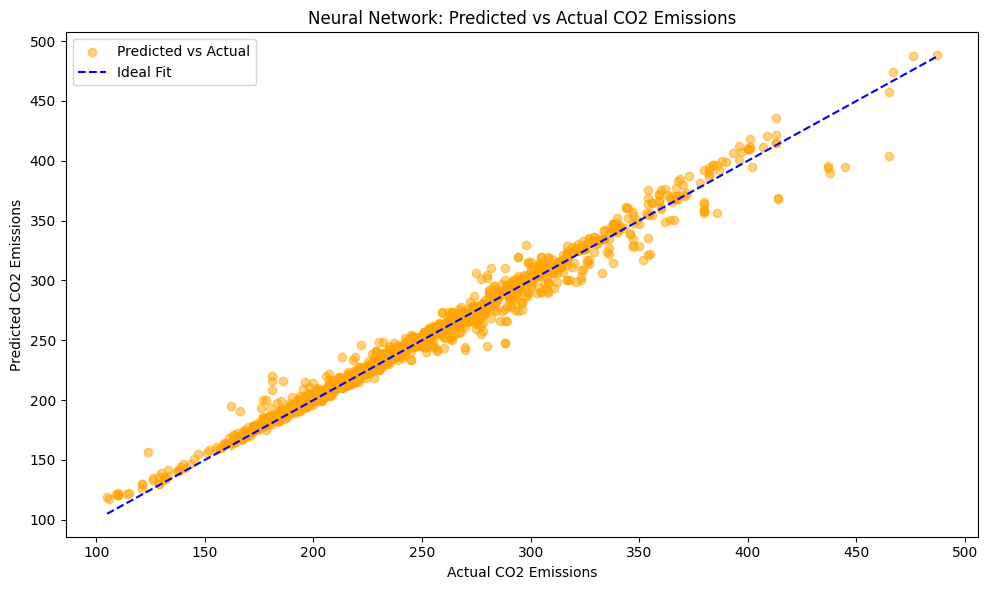

In [46]:
# Neural Network Results Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, nn_predictions, alpha=0.5, color='orange', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='Ideal Fit')
plt.title('Neural Network: Predicted vs Actual CO2 Emissions')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.legend()
plt.tight_layout()
plt.show()

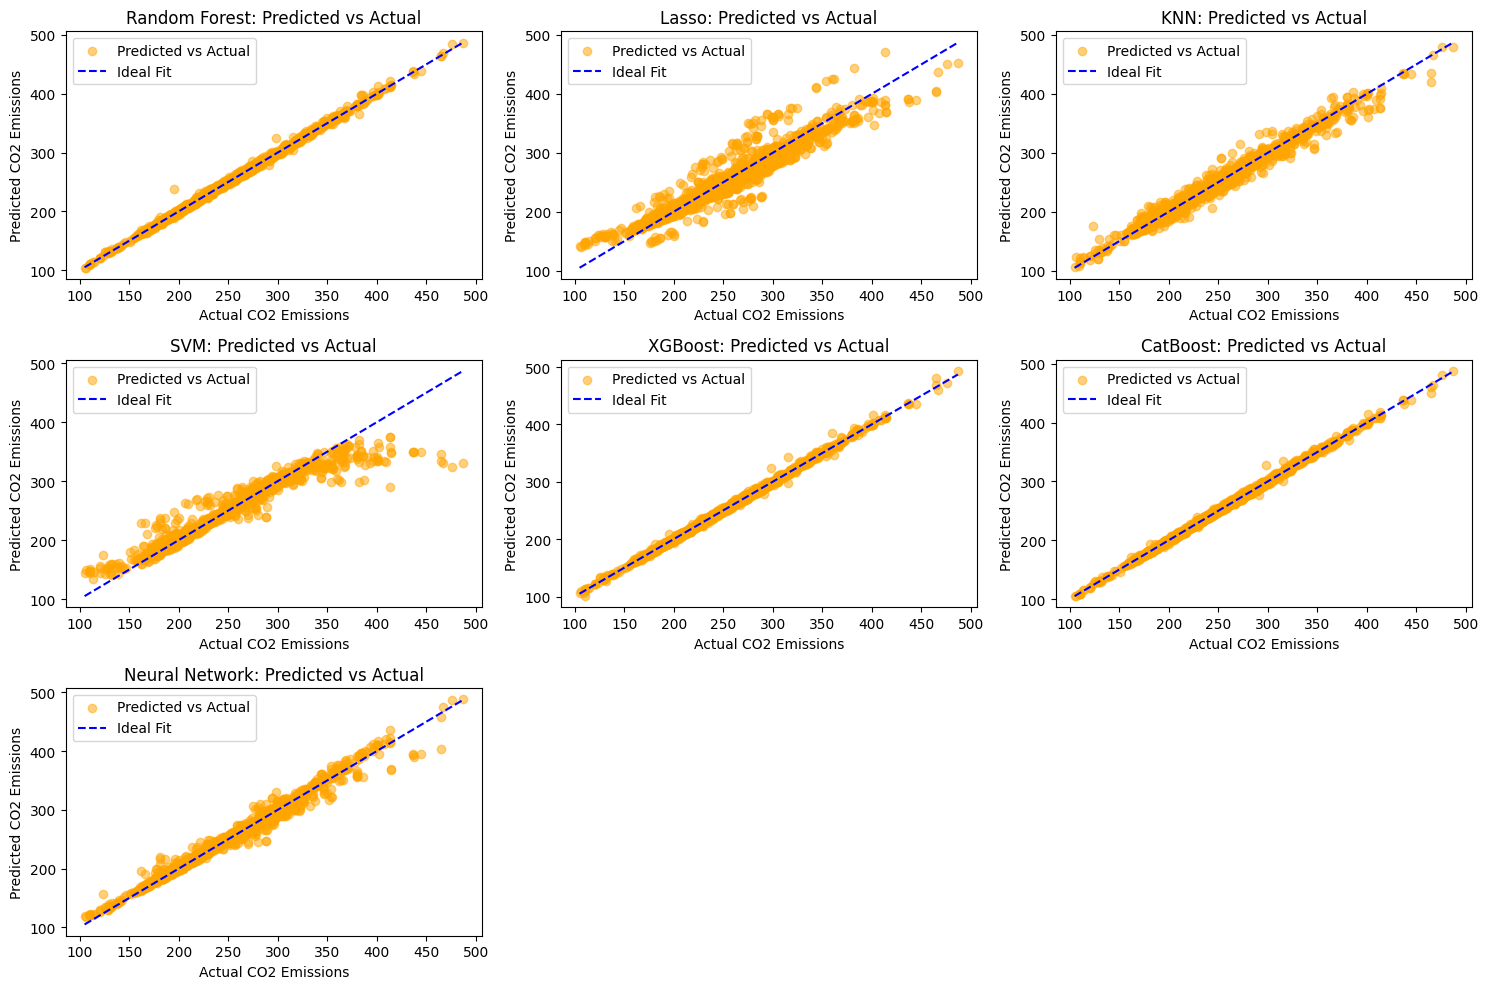

In [47]:
plt.figure(figsize=(15, 10))
num_models = len(predictions) + 1  # Including Neural Network

for i, (model_name, model_predictions) in enumerate(predictions.items(), 1):
    plt.subplot(3, 3, i)
    plt.scatter(y_test, model_predictions, alpha=0.5, color='orange', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='Ideal Fit')
    plt.title(f'{model_name}: Predicted vs Actual')
    plt.xlabel('Actual CO2 Emissions')
    plt.ylabel('Predicted CO2 Emissions')
    plt.legend()

# Add Neural Network to the subplots
plt.subplot(3, 3, num_models)
plt.scatter(y_test, nn_predictions, alpha=0.5, color='orange', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='Ideal Fit')
plt.title('Neural Network: Predicted vs Actual')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.legend()

plt.tight_layout()
plt.show()

In [48]:
def reverse_scale(scaler, X_scaled):
    return scaler.inverse_transform(X_scaled)

original_X_test = reverse_scale(scaler, X_test)
print("Reversed scaled data for interpretability.")

Reversed scaled data for interpretability.


In [50]:
# Output the Neural Network Model
joblib.dump(nn_model, "/workspaces/machine_learning_zoomcamp/Capstone_Project/model/nn_model.pkl")

['/workspaces/machine_learning_zoomcamp/Capstone_Project/model/nn_model.pkl']